In [6]:
# Import packages:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime
from fixdata import fixdata

# Set default plotting parameters:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams[ 'font.sans-serif'  ] = 'Calibri'
mpl.rcParams[ 'font.size'        ] = 10
mpl.rcParams[ 'mathtext.default' ] = 'regular'          
mpl.rcParams[ 'xtick.direction'  ] = 'out'
mpl.rcParams[ 'ytick.direction'  ] = 'out'       
mpl.rcParams[ 'lines.linewidth'  ] = 1.0     

# Specify dataset name and location:
name = str(int(np.loadtxt('Data/name.txt')))
latitude  = -22.132705 # degrees north (- = south)
longitude = 133.413717 # degrees east  (- = west)

# Import vented groundwater pressure logger data:
data = np.loadtxt('Data/titree1.txt', delimiter='\t')
#data = np.loadtxt('Data/'+name+'.txt', delimiter='\t')
k  = range(30-1, len(data))
t1 = (np.array(data[k,0])-25569.)*86400. # time (Excel datetime values converted to seconds units)
w1 = data[k,1] # groundwater pressure
T1 = data[k,2] # temperature
w1 = fixdata(w1, 0.3) # remove fluctuations > 0.3 cm
np.savetxt('Data/t1.dat',  t1)
np.savetxt('Data/w1.dat',  w1)
np.savetxt('Data/T1b.dat', T1)

# Import barometric logger data:
data = np.loadtxt('Data/titree2.txt', delimiter='\t') 
k  = range(20-1, len(data))
t2 = (np.array(data[k,0])-25569.)*86400. # time (Excel datetime values converted to seconds units)
T2 = data[k,1] # temperature
h2 = data[k,2] # gauge pressure
bp = data[k,3] # barometric pressure 
bp = fixdata(bp, 1.) # remove fluctuations > 1.0 cm
w2 = h2-bp # convert to gauge pressure (by subtracting barometric pressure)
w2 = fixdata(w2, 1.) # remove fluctuations > 1.0 cm 
bp = bp-1033.227 # subtract mean barometric pressure
np.savetxt('Data/t2.dat',  t2)
np.savetxt('Data/T2b.dat', T2)
np.savetxt('Data/h2.dat',  h2)
np.savetxt('Data/w2.dat',  w2)
np.savetxt('Data/bp.dat',  bp)

# Import capacitance pressure data:
data = np.loadtxt('Data/titree3.txt', delimiter='\t')
k  = range(len(data))
t3 = (np.array(data[k,0])-25569.)*86400.
w3 = 100.*data[k,2] # convert from m to cm units
np.savetxt('Data/t3.dat', t3)
np.savetxt('Data/w3.dat', w3)

# Convert time data from float values to datetime values:
t1 = [datetime.utcfromtimestamp(i) for i in t1]
t2 = [datetime.utcfromtimestamp(i) for i in t2]
t3 = [datetime.utcfromtimestamp(i) for i in t3]

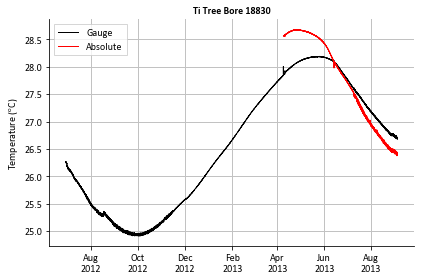

In [7]:
# Plot temperature versus time:
%matplotlib inline
f,s = plt.subplots()
s.set_title('Ti Tree Bore '+name, fontsize=10, fontweight='bold')
s.plot(t1, T1, 'k-', label='Gauge')
s.plot(t2, T2, 'r-', label='Absolute')
s.set_ylabel('Temperature ($^o$C)')
s.legend(loc=2, fancybox=False)
s.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b\n%Y'))
#s.set_xlim(datetime(2012, 6, 15), datetime(2013, 9, 15))
#s.set_ylim(24.5, 29.0)
for i in ['top', 'right']:
    s.spines[i].set_visible(False)
s.grid(which='major', axis='both', c=(194./255., 194./255., 194./255.), ls='-', lw=1.0)                            
plt.tight_layout()

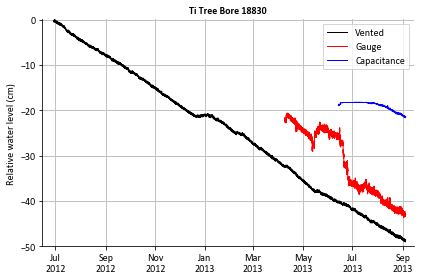

In [10]:
# Plot pressure versus time:
%matplotlib inline
f,s = plt.subplots()
s.set_title('Ti Tree Bore '+name, fontsize=10, fontweight='bold')
s.plot(t1, w1-190., 'k-', label='Vented')
#s.set_xlim(datetime(2012, 6, 15), datetime(2013, 9, 15))
s.plot(t2, w2-105., 'r-', label='Gauge')
s.plot(t3, w3-75.,  'b-', label='Capacitance')
s.set_ylabel('Relative water level (cm)')
s.legend(loc=1, fancybox=False)
for i in ['top', 'right']:
    s.spines[i].set_visible(False)
s.grid(which='major', axis='both', c=(194./255., 194./255., 194./255.), ls='-', lw=1.0)                            
s.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b\n%Y'))
#s.set_ylim(-50., 0.05)
plt.tight_layout()